In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

# 다중공선성

In [82]:
all_train = pd.read_csv('scaled_data.csv')
all_train.head()

,Unnamed: 0,index,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken,order_month,order_day,diff_picked_min,...,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban,order_week_Monday,order_week_Saturday,order_week_Sunday,order_week_Thursday,order_week_Tuesday,order_week_Wednesday
0,0,0,0.894737,0.96,1.0,0.000000,0.318182,0.181818,0.586207,1.0,...,0,0,0,1,0,1,0,0,0,0
1,1,1,0.736842,0.80,1.0,0.333333,0.522727,0.181818,0.793103,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2,2,0.157895,0.76,0.0,0.333333,0.363636,0.181818,0.586207,1.0,...,0,0,0,1,0,1,0,0,0,0
3,3,3,0.947368,0.88,0.0,0.333333,0.250000,0.363636,0.068966,0.5,...,0,0,0,0,0,0,0,0,0,1
4,4,4,0.631579,0.84,0.5,0.333333,0.454545,0.181818,0.827586,1.0,...,1,0,0,0,0,1,0,0,0,0


In [83]:
all_train = all_train.iloc[:,2:]

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(all_train.values, i) for i in range(all_train.shape[1])]
vif["features"] = all_train.columns
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif = vif.reset_index().drop(columns = 'index')
vif

,VIF Factor,features
0,25.262097,Delivery_person_Ratings
1,9.633762,Type_of_vehicle_motorcycle
2,7.500685,Time_taken
3,4.719550,Type_of_vehicle_scooter
4,4.382135,Delivery_person_Age
5,4.176383,Road_traffic_density_Jam
6,4.090752,Road_traffic_density_Low
7,3.904813,Vehicle_condition
8,3.375564,order_month
9,3.300035,Road_traffic_density_Medium


### Delivery_person_Ratings, Type_of_vehicle_motorcycle 제거 

In [85]:
all_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken', 'order_month', 'order_day',
       'diff_picked_min', 'Weatherconditions_conditions Sandstorms',
       'Weatherconditions_conditions Stormy',
       'Weatherconditions_conditions Sunny',
       'Weatherconditions_conditions Windy', 'Road_traffic_density_Jam ',
       'Road_traffic_density_Low ', 'Road_traffic_density_Medium ',
       'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_motorcycle ', 'Type_of_vehicle_scooter ',
       'Festival_Yes ', 'City_Semi-Urban ', 'City_Urban ', 'order_week_Monday',
       'order_week_Saturday', 'order_week_Sunday', 'order_week_Thursday',
       'order_week_Tuesday', 'order_week_Wednesday'],
      dtype='object')

In [86]:
all_train = all_train.drop(['Delivery_person_Ratings','Type_of_vehicle_motorcycle '], axis=1)

In [87]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41616 entries, 0 to 41615
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Delivery_person_Age                      41616 non-null  float64
 1   Vehicle_condition                        41616 non-null  float64
 2   multiple_deliveries                      41616 non-null  float64
 3   Time_taken                               41616 non-null  float64
 4   order_month                              41616 non-null  float64
 5   order_day                                41616 non-null  float64
 6   diff_picked_min                          41616 non-null  float64
 7   Weatherconditions_conditions Sandstorms  41616 non-null  int64  
 8   Weatherconditions_conditions Stormy      41616 non-null  int64  
 9   Weatherconditions_conditions Sunny       41616 non-null  int64  
 10  Weatherconditions_conditions Windy       41616

# PCA 분석 

In [88]:
from sklearn.decomposition import PCA

# PCA 주성분분석
pca = PCA(random_state=1107)
X_p = pca.fit_transform(all_train)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.096272
1     0.176661
2     0.251584
3     0.322033
4     0.391912
5     0.441531
6     0.488573
7     0.535318
8     0.581605
9     0.627308
10    0.671997
11    0.716536
12    0.757763
13    0.797739
14    0.832786
15    0.863753
16    0.893560
17    0.920493
18    0.937831
19    0.954551
20    0.964733
21    0.974724
22    0.983178
23    0.989416
24    0.994756
25    0.998990
26    1.000000
dtype: float64

In [89]:
mlp.rcParams['axes.unicode_minus'] = False

# customize matplitlib
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

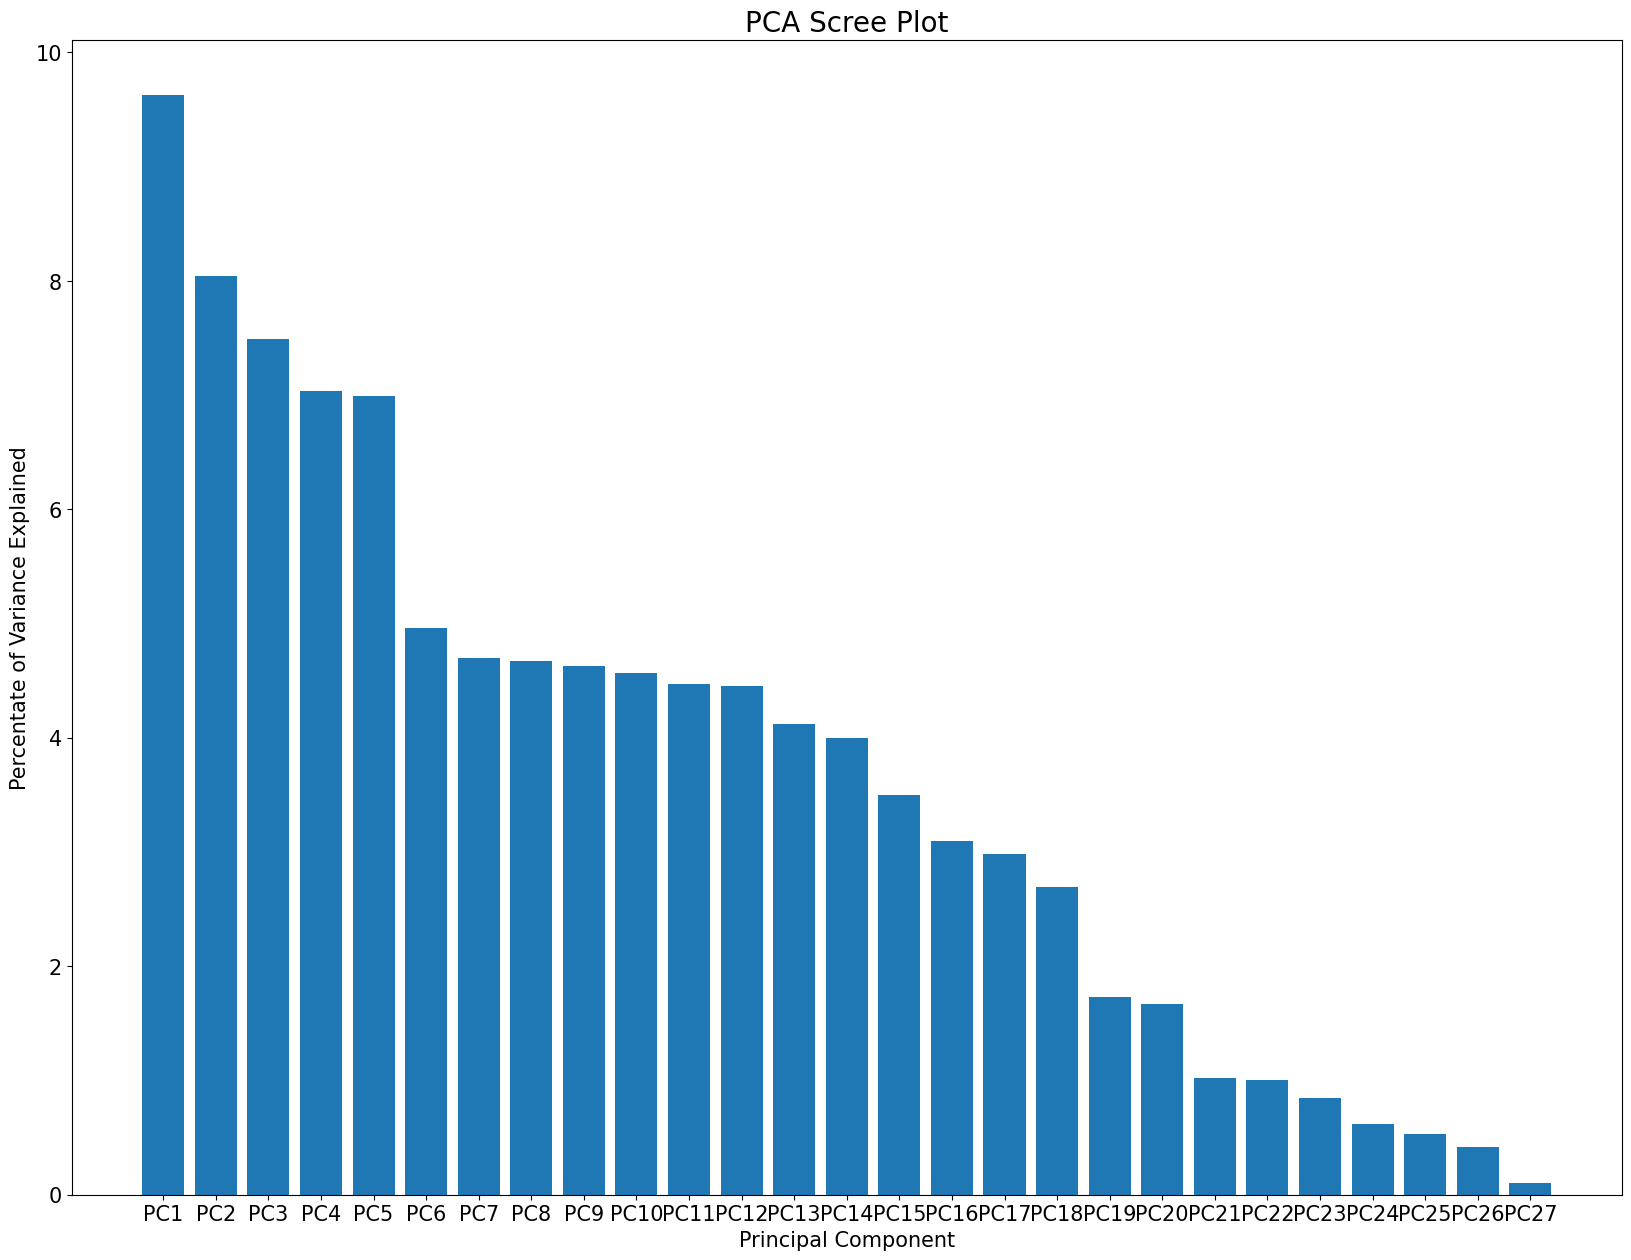

In [90]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

* 변수를 20개까지 줄일 수 있음

In [91]:
pca = PCA(n_components=20, random_state=1004)
all_train_pca = pca.fit_transform(all_train)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.096272
1     0.176661
2     0.251584
3     0.322033
4     0.391912
5     0.441531
6     0.488573
7     0.535318
8     0.581605
9     0.627308
10    0.671997
11    0.716536
12    0.757763
13    0.797739
14    0.832786
15    0.863753
16    0.893560
17    0.920493
18    0.937831
19    0.954551
dtype: float64

In [92]:
PCs = pca.transform(all_train)[:,0:20]
PCs.shape

(41616, 20)

In [93]:
X_pp = pd.DataFrame(PCs, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                          'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18',
                                          'PC19','PC20'])
X_pp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.147023,0.144098,-0.010376,0.722161,-0.377036,1.094071,0.047138,0.327253,-0.170867,-0.204832,0.044159,0.510584,-0.251250,0.125113,0.252302,0.904078,0.337506,0.547110,-0.130695,-0.197283
1,0.678025,0.871577,-0.478875,0.643225,-0.358678,-0.400776,0.732538,-0.587607,0.243237,0.004812,0.134600,-0.148847,0.231016,0.076088,0.100680,0.268408,-0.053449,0.173393,-0.125090,-0.185189
2,-0.774106,-0.538470,-0.212482,0.009957,0.856572,0.616283,-0.307433,0.733998,0.507342,0.088208,-0.205513,-0.490670,-0.333147,0.030335,0.261018,0.803918,-0.301640,-0.286966,-0.132715,-0.065569
3,0.155215,-0.531875,0.895002,0.068866,-0.066289,0.180964,-0.226745,-0.011407,0.126005,-0.631694,-0.146339,0.908940,0.414534,-0.266967,-0.147341,-0.258944,-0.216978,0.328852,0.445719,-0.248797
4,0.034480,0.526777,-0.009478,0.685416,-0.421542,-0.252204,0.086321,0.462816,-0.105557,-0.049793,-0.042139,0.194473,-0.202336,0.141057,0.312324,0.929616,-0.539677,0.025594,-0.147244,0.282763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41611,0.060032,-0.342511,0.077229,-0.683010,-0.428173,-0.280405,-0.096774,-0.237764,-0.816964,0.733786,-0.533876,-0.066690,0.048173,-0.221267,-0.102238,0.195503,0.188017,0.014873,-0.142790,-0.183779
41612,0.825550,-0.533323,-0.357653,0.047484,0.034645,-0.169171,-0.299420,0.390959,-0.703306,-0.429933,-0.554377,-0.207670,0.604902,-0.294234,-0.091326,0.013930,-0.112292,-0.498482,0.437944,-0.092821
41613,-0.801770,0.476169,-0.200284,-0.054355,0.813642,-0.312639,0.195326,0.398994,-0.169825,0.353831,-0.515333,0.422950,-0.560443,-0.333691,-0.212266,-0.412732,-0.320234,-0.084376,-0.163622,0.225557
41614,0.094904,-0.547361,0.018681,0.722431,-0.374782,-0.123075,-0.123703,-0.430154,0.216673,-0.161799,0.035462,0.016803,-0.244214,0.755048,-0.487269,-0.345355,-0.054985,-0.543691,-0.150520,0.358182


# 데이터 분할 

In [94]:
X = all_train.drop('Time_taken', axis=1)
X

,Delivery_person_Age,Vehicle_condition,multiple_deliveries,order_month,order_day,diff_picked_min,Weatherconditions_conditions Sandstorms,Weatherconditions_conditions Stormy,Weatherconditions_conditions Sunny,Weatherconditions_conditions Windy,...,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban,order_week_Monday,order_week_Saturday,order_week_Sunday,order_week_Thursday,order_week_Tuesday,order_week_Wednesday
0,0.894737,1.0,0.000000,0.181818,0.586207,1.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0.736842,1.0,0.333333,0.181818,0.793103,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.157895,0.0,0.333333,0.181818,0.586207,1.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.947368,0.0,0.333333,0.363636,0.068966,0.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.631579,0.5,0.333333,0.181818,0.827586,1.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41611,0.526316,0.5,0.000000,0.181818,0.758621,0.5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
41612,0.052632,0.0,0.333333,0.090909,0.482759,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
41613,0.526316,0.5,0.000000,0.909091,0.034483,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41614,0.000000,0.0,0.333333,0.545455,0.034483,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [95]:
y = all_train[['Time_taken']]
y

,Time_taken
0,0.318182
1,0.522727
2,0.363636
3,0.250000
4,0.454545
...,...
41611,0.500000
41612,0.590909
41613,0.136364
41614,0.363636


In [96]:
X.shape

(41616, 26)

In [97]:
y.shape

(41616, 1)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33292, 26), (8324, 26), (33292, 1), (8324, 1))

# variable selection

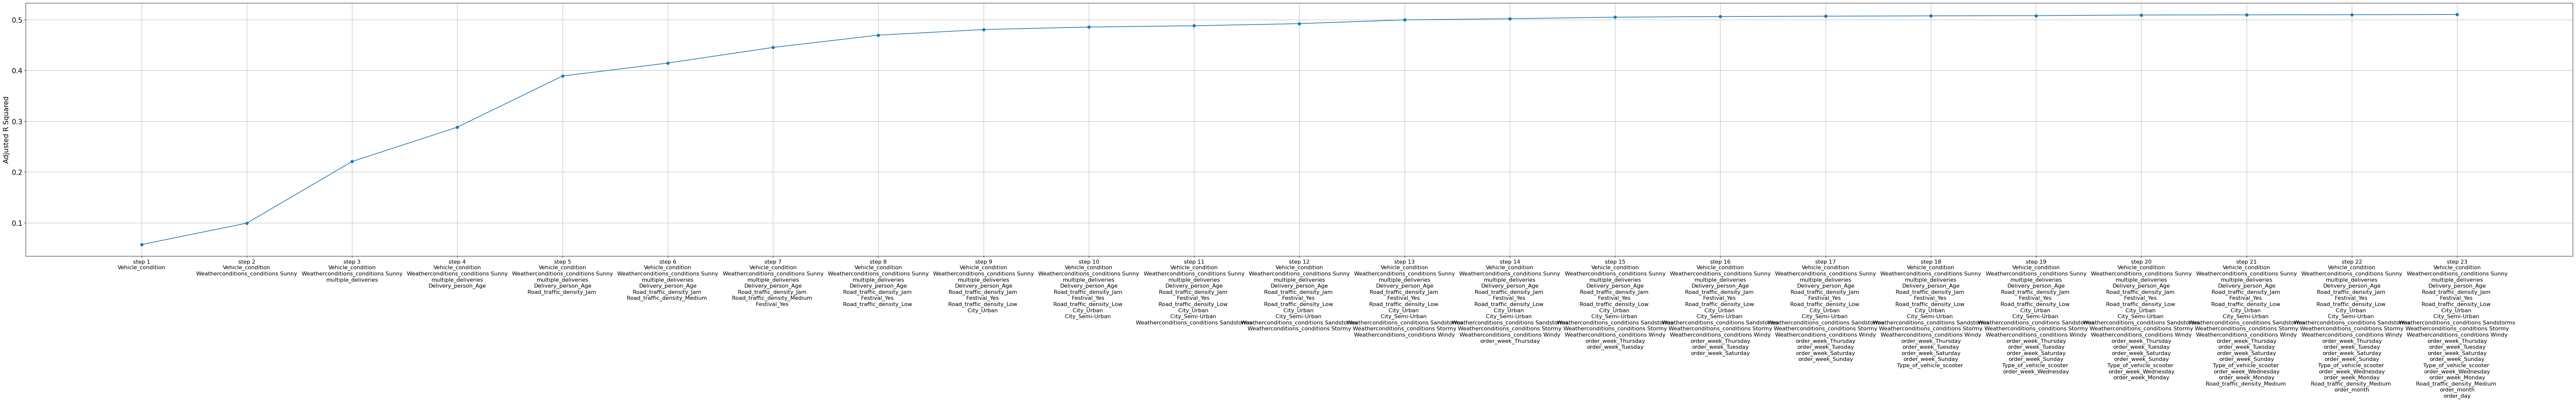

In [100]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist()):
    
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.savefig('stepwise.jpg')
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X_train, y_train)

In [101]:
#stepwise_step9
all_train.columns

Index(['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries',
       'Time_taken', 'order_month', 'order_day', 'diff_picked_min',
       'Weatherconditions_conditions Sandstorms',
       'Weatherconditions_conditions Stormy',
       'Weatherconditions_conditions Sunny',
       'Weatherconditions_conditions Windy', 'Road_traffic_density_Jam ',
       'Road_traffic_density_Low ', 'Road_traffic_density_Medium ',
       'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_scooter ', 'Festival_Yes ', 'City_Semi-Urban ',
       'City_Urban ', 'order_week_Monday', 'order_week_Saturday',
       'order_week_Sunday', 'order_week_Thursday', 'order_week_Tuesday',
       'order_week_Wednesday'],
      dtype='object')

In [102]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41616 entries, 0 to 41615
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Delivery_person_Age                      41616 non-null  float64
 1   Vehicle_condition                        41616 non-null  float64
 2   multiple_deliveries                      41616 non-null  float64
 3   Time_taken                               41616 non-null  float64
 4   order_month                              41616 non-null  float64
 5   order_day                                41616 non-null  float64
 6   diff_picked_min                          41616 non-null  float64
 7   Weatherconditions_conditions Sandstorms  41616 non-null  int64  
 8   Weatherconditions_conditions Stormy      41616 non-null  int64  
 9   Weatherconditions_conditions Sunny       41616 non-null  int64  
 10  Weatherconditions_conditions Windy       41616

In [103]:
step10_columns = ['Vehicle_condition','Weatherconditions_conditions Sunny','multiple_deliveries','Delivery_person_Age',
                  'Road_traffic_density_Jam ','Road_traffic_density_Low ','Festival_Yes ','Road_traffic_density_Low ','City_Urban ',
                  'City_Semi-Urban ','Time_taken']

In [104]:
all_train_step10 = all_train[step10_columns]
all_train_step10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41616 entries, 0 to 41615
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle_condition                   41616 non-null  float64
 1   Weatherconditions_conditions Sunny  41616 non-null  int64  
 2   multiple_deliveries                 41616 non-null  float64
 3   Delivery_person_Age                 41616 non-null  float64
 4   Road_traffic_density_Jam            41616 non-null  int64  
 5   Road_traffic_density_Low            41616 non-null  int64  
 6   Festival_Yes                        41616 non-null  int64  
 7   Road_traffic_density_Low            41616 non-null  int64  
 8   City_Urban                          41616 non-null  int64  
 9   City_Semi-Urban                     41616 non-null  int64  
 10  Time_taken                          41616 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 3.5

# 데이터 분할 

In [105]:
X = all_train_step10.drop('Time_taken', axis=1)
X

,Vehicle_condition,Weatherconditions_conditions Sunny,multiple_deliveries,Delivery_person_Age,Road_traffic_density_Jam,Road_traffic_density_Low,Festival_Yes,Road_traffic_density_Low,City_Urban,City_Semi-Urban
0,1.0,1,0.000000,0.894737,0,0,0,0,1,0
1,1.0,0,0.333333,0.736842,1,0,0,0,0,0
2,0.0,0,0.333333,0.157895,0,1,0,1,1,0
3,0.0,1,0.333333,0.947368,0,0,0,0,0,0
4,0.5,0,0.333333,0.631579,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41611,0.5,0,0.000000,0.526316,0,0,0,0,0,0
41612,0.0,0,0.333333,0.052632,1,0,0,0,0,0
41613,0.5,0,0.000000,0.526316,0,1,0,1,0,0
41614,0.0,0,0.333333,0.000000,0,0,0,0,0,0


In [106]:
y = all_train_step10[['Time_taken']]
y

,Time_taken
0,0.318182
1,0.522727
2,0.363636
3,0.250000
4,0.454545
...,...
41611,0.500000
41612,0.590909
41613,0.136364
41614,0.363636


In [107]:
X.shape

(41616, 10)

In [108]:
y.shape

(41616, 1)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33292, 10), (8324, 10), (33292, 1), (8324, 1))

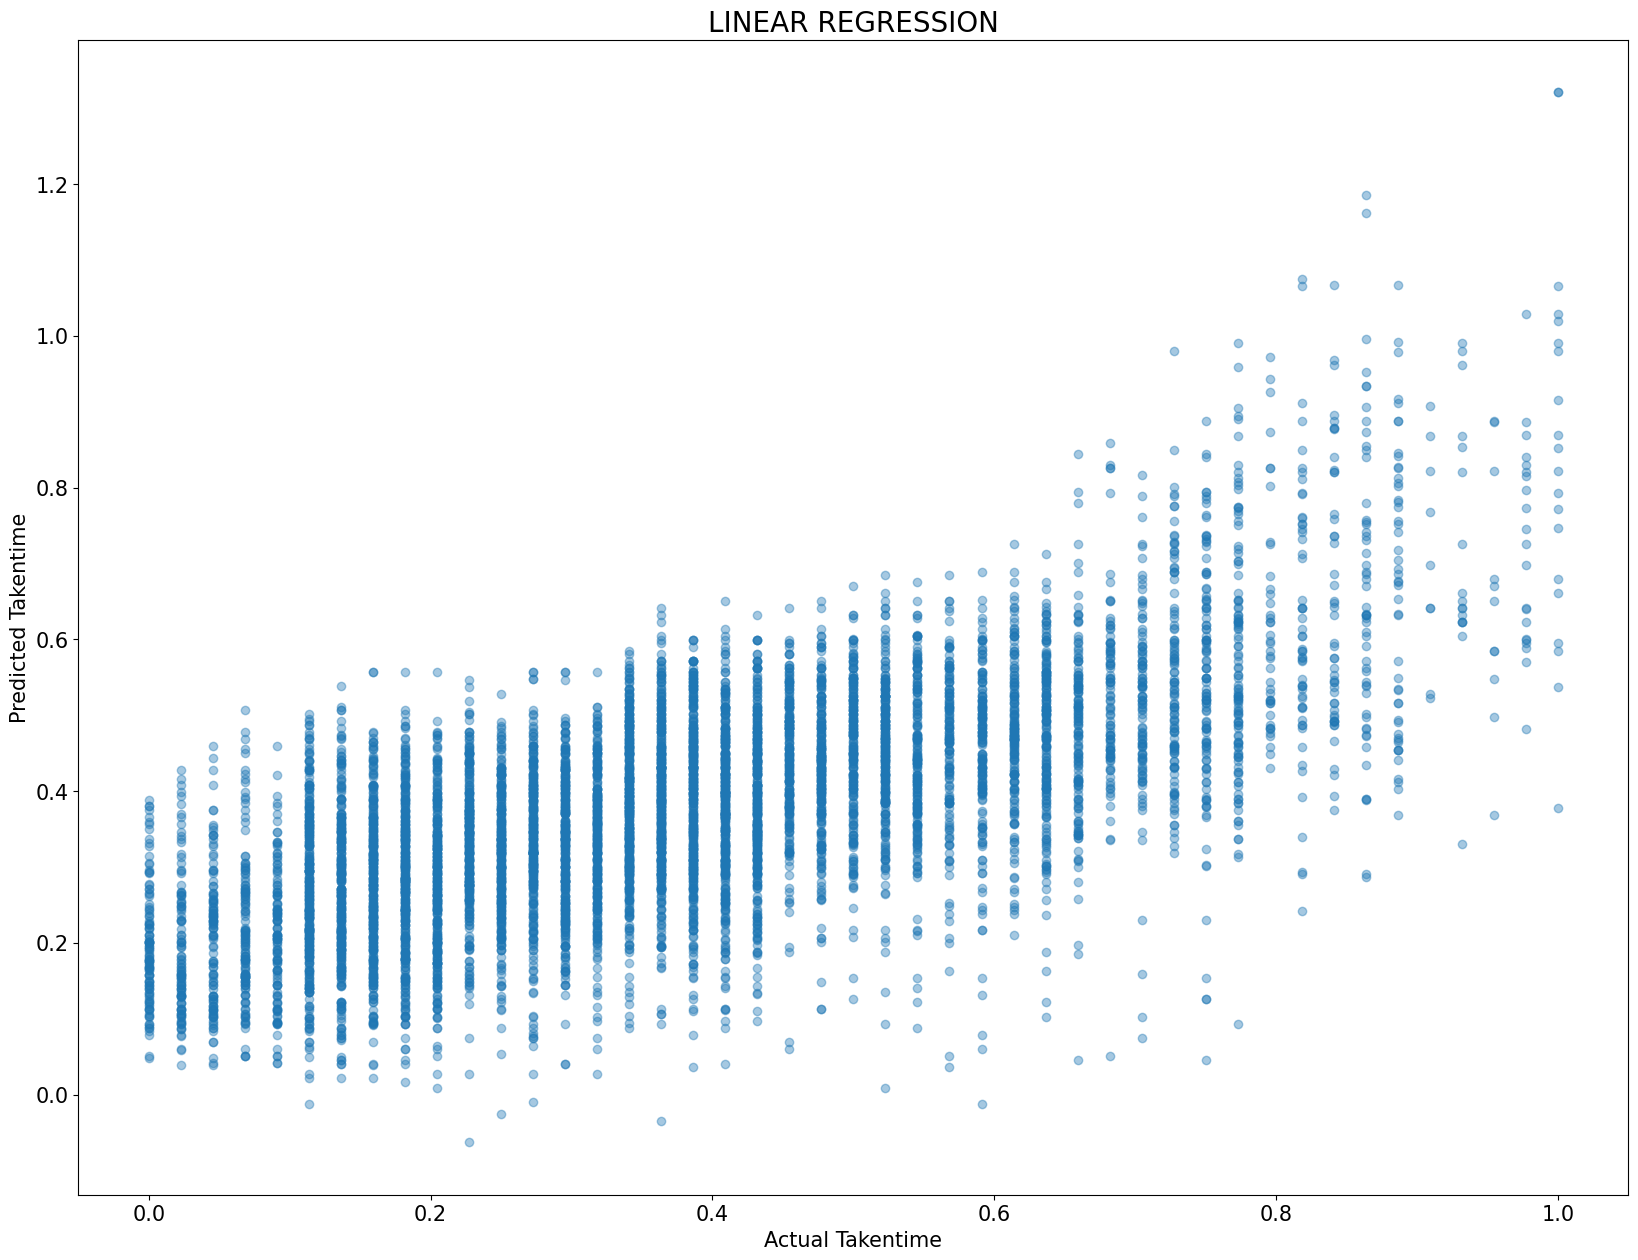

In [111]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Takentime")
plt.ylabel("Predicted Takentime")
plt.title("LINEAR REGRESSION")
plt.show()

In [112]:
reg.coef_

array([[-1.01953691e-01, -1.04181866e-01,  2.54891924e-01,
         1.77409254e-01,  7.89299629e-02, -2.16151430e+12,
         2.54422028e-01,  2.16151430e+12, -5.26733153e-02,
         2.46106904e-01]])

In [113]:
reg.intercept_

array([0.30935905])

In [114]:
print(reg.score(X_train, y_train)) #train set R^2 점수
print(reg.score(X_test, y_test)) #test set R^2 점수

0.4855276114991477
0.48466360964766897


# RMSE

In [115]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
np.sqrt(MSE)

0.15257543669913926

# Ridge

In [116]:
from sklearn.linear_model import Ridge

alpha_train_score = []
alpha_test_score = []
alpha_set = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
# alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.

rmse_train_list = []
rmse_test_list = []

for i in alpha_set:
    ridge=Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    
    ytrain_result = ridge.predict(X_train)
    ytest_result  = ridge.predict(X_test)

    ridge_tr_score = round(ridge.score(X_train, y_train), 3)
    ridge_te_score = round(ridge.score(X_test, y_test), 3)

    alpha_train_score.append(ridge_tr_score)
    alpha_test_score.append(ridge_te_score)
    
    rmse_train = round(np.sqrt(mean_squared_error(y_train, ytrain_result)), 5)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, ytest_result)), 5)
    
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)    


print("alpha_set           :", alpha_set)
# [0.1, 1, 10]

print("alpha_train_score   :", alpha_train_score)
# [0.575, 0.575, 0.574]

print("alpha_test_score    :", alpha_test_score)
# [0.578, 0.578, 0.578]

print(">> alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.")
print()

print('Train 데이터의 RMSE 값 : ', rmse_train_list)
print('Test  데이터의 RMSE 값 : ', rmse_test_list)
print(">> alpha값이 커질수록(규제가 강화될수록) RMSE는 커진다.")
print()

alpha_set           : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
alpha_train_score   : [0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.485]
alpha_test_score    : [0.485, 0.485, 0.485, 0.485, 0.485, 0.485, 0.485, 0.485, 0.485, 0.484]
>> alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.

Train 데이터의 RMSE 값 :  [0.15212, 0.15212, 0.15212, 0.15212, 0.15212, 0.15212, 0.15212, 0.15212, 0.15212, 0.1522]
Test  데이터의 RMSE 값 :  [0.15256, 0.15256, 0.15256, 0.15256, 0.15256, 0.15256, 0.15256, 0.15256, 0.15257, 0.15266]
>> alpha값이 커질수록(규제가 강화될수록) RMSE는 커진다.



# Lasso

In [118]:
from sklearn.linear_model import Lasso
from sklearn import metrics

alpha_train_score_la = []
alpha_test_score_la = []
alpha_set = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
# alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.

rmse_train_list_la = []
rmse_test_list_la = []

for i in alpha_set:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    
    ytrain_result_la = lasso.predict(X_train)
    ytest_result_la  = lasso.predict(X_test)

    lasso_tr_score = round(lasso.score(X_train, y_train), 3)
    lasso_te_score = round(lasso.score(X_test, y_test), 3)

    alpha_train_score_la.append(lasso_tr_score)
    alpha_test_score_la.append(lasso_te_score)
    
    rmse_train_la = round(np.sqrt(mean_squared_error(y_train, ytrain_result_la)), 5)
    rmse_test_la = round(np.sqrt(mean_squared_error(y_test, ytest_result_la)), 5)
    
    rmse_train_list_la.append(rmse_train_la)
    rmse_test_list_la.append(rmse_test_la)    


print("alpha_set           :", alpha_set)
# [0.1, 1, 10]

print("alpha_train_score   :", alpha_train_score_la)
# [0.575, 0.575, 0.574]

print("alpha_test_score    :", alpha_test_score_la)
# [0.578, 0.578, 0.578]

print(">> alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.")
print()

print('Train 데이터의 RMSE 값 : ', rmse_train_list_la)
print('Test  데이터의 RMSE 값 : ', rmse_test_list_la)
print(">> alpha값이 커질수록(규제가 강화될수록) RMSE는 커진다.")
print()

alpha_set           : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
alpha_train_score   : [0.479, 0.433, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
alpha_test_score    : [0.478, 0.429, 0.335, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
>> alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.

Train 데이터의 RMSE 값 :  [0.15313, 0.15975, 0.17228, 0.21208, 0.21208, 0.21208, 0.21208, 0.21208, 0.21208, 0.21208]
Test  데이터의 RMSE 값 :  [0.15359, 0.16055, 0.17335, 0.21254, 0.21254, 0.21254, 0.21254, 0.21254, 0.21254, 0.21254]
>> alpha값이 커질수록(규제가 강화될수록) RMSE는 커진다.



# Elastic Net

In [119]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics

alpha_train_score_la = []
alpha_test_score_la = []
alpha_set = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
# alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.

rmse_train_list_la = []
rmse_test_list_la = []

for i in alpha_set :
    
    regr = ElasticNet(random_state=0,alpha=i)
    regr.fit(X_train, y_train)
    
    ytrain_result_la = regr.predict(X_train)
    ytest_result_la  = regr.predict(X_test)

    regr_tr_score = round(regr.score(X_train, y_train), 3)
    regr_te_score = round(regr.score(X_test, y_test), 3)

    alpha_train_score_la.append(regr_tr_score)
    alpha_test_score_la.append(regr_te_score)
    
    rmse_train_la = round(np.sqrt(mean_squared_error(y_train, ytrain_result_la)), 5)
    rmse_test_la = round(np.sqrt(mean_squared_error(y_test, ytest_result_la)), 5)
    
    rmse_train_list_la.append(rmse_train_la)
    rmse_test_list_la.append(rmse_test_la)    


print("alpha_set           :", alpha_set)
# [0.1, 1, 10]

print("alpha_train_score   :", alpha_train_score_la)
# [0.575, 0.575, 0.574]

print("alpha_test_score    :", alpha_test_score_la)
# [0.578, 0.578, 0.578]

print(">> alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.")
print()

print('Train 데이터의 RMSE 값 : ', rmse_train_list_la)
print('Test  데이터의 RMSE 값 : ', rmse_test_list_la)
print(">> alpha값이 커질수록(규제가 강화될수록) RMSE는 커진다.")
print()

alpha_set           : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
alpha_train_score   : [0.483, 0.465, 0.425, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
alpha_test_score    : [0.482, 0.463, 0.421, 0.096, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
>> alpha값이 커질수록(규제가 강화될수록) 정확도는 낮아진다.

Train 데이터의 RMSE 값 :  [0.15245, 0.15513, 0.16083, 0.20116, 0.21208, 0.21208, 0.21208, 0.21208, 0.21208, 0.21208]
Test  데이터의 RMSE 값 :  [0.15291, 0.15573, 0.16166, 0.20205, 0.21254, 0.21254, 0.21254, 0.21254, 0.21254, 0.21254]
>> alpha값이 커질수록(규제가 강화될수록) RMSE는 커진다.

